# Neural Network modelling

In this notebook we are going to build neural network models on our full dataset and small size datasets. For the full size dataset we will build two models. One where we do not pay attention to class imbalance and one where we do. For the small size dataset where we have not manually balanced the data, we will create two models with the same procedure as with the full size dataset. However, with the manually balanced small dataset we will create the model without using the parameter class_weight. In this way, we can compare whether it works best to manually balance the dataset or use the built in parameter class_weight in a Neural network.

# Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Neural Network on the full size dataset

### Loading and splittig the data

In [2]:
df_full_size = pd.read_csv('/content/drive/MyDrive/BDA final project/data-full-size.csv')
df_full_size

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381104,381105,1,74,1,1,0,30170.0,88,0,...,0,0,0,0,0,0,0,1,0,0
381105,381105,381106,1,30,1,1,0,40016.0,131,0,...,0,0,0,0,0,0,0,0,1,0
381106,381106,381107,1,21,1,1,0,35118.0,161,0,...,0,0,0,0,0,1,0,0,1,0
381107,381107,381108,0,68,1,0,1,44617.0,74,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df_full_size = df_full_size.iloc[:,2:]
df_full_size.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df_full_size['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [5]:
X = df_full_size.drop('Response', axis = 1)
y = df_full_size['Response']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [8]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [9]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [10]:
#Example of scaled feature
X_train_scaled[0][0]

-0.2454985995712122

In [11]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [12]:
#Number of features
X.shape[1]

218

### Constructing the models and tuning

In [13]:
#This function will be used to create models throughout the notebook. 
def design_model(modelname):
  modelname = Sequential(name=modelname)

  input = layers.InputLayer(input_shape = X.shape[1])
  modelname.add(input)
  modelname.add(layers.Dense(64, activation='relu'))
  modelname.add(layers.Dropout(0.2))
  modelname.add(layers.Dense(32, activation='relu'))
  modelname.add(layers.Dropout(0.1))
  modelname.add(layers.Dense(1, activation='sigmoid'))

  return modelname

In [14]:
network_full_size = design_model('network_full_size')
network_full_size.summary()

Model: "network_full_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                14016     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [15]:
network_full_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
es = EarlyStopping(monitor='accuracy', patience = 4)

In [17]:
network_full_size_history = network_full_size.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 70, callbacks = [es])

Epoch 1/70
8039/8039 [==============================] - 27s 3ms/step - loss: 0.2723 - accuracy: 0.8768 - val_loss: 0.2661 - val_accuracy: 0.8784
Epoch 2/70
8039/8039 [==============================] - 24s 3ms/step - loss: 0.2675 - accuracy: 0.8770 - val_loss: 0.2658 - val_accuracy: 0.8784
Epoch 3/70
8039/8039 [==============================] - 24s 3ms/step - loss: 0.2665 - accuracy: 0.8771 - val_loss: 0.2651 - val_accuracy: 0.8782
Epoch 4/70
8039/8039 [==============================] - 23s 3ms/step - loss: 0.2659 - accuracy: 0.8771 - val_loss: 0.2652 - val_accuracy: 0.8783
Epoch 5/70
8039/8039 [==============================] - 23s 3ms/step - loss: 0.2654 - accuracy: 0.8773 - val_loss: 0.2659 - val_accuracy: 0.8785
Epoch 6/70
8039/8039 [==============================] - 23s 3ms/step - loss: 0.2651 - accuracy: 0.8770 - val_loss: 0.2655 - val_accuracy: 0.8785
Epoch 7/70
8039/8039 [==============================] - 23s 3ms/step - loss: 0.2648 - accuracy: 0.8772 - val_loss: 0.2651 - val_ac

[Working with imbalanced data in Keras](https://keras.io/examples/structured_data/imbalanced_classification/)

In [20]:
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
class_weight_full_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000039886, weight for 1(Interested) 0.0000284746


In [19]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)))

Number of positive samples in training data: 35119 (12.29% of total)


In [21]:
network_full_size_balanced = design_model('network_full_size_balanced')

In [22]:
network_full_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [23]:
history_network_full_size_balanced = network_full_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_full_size)

Epoch 1/70
8039/8039 [==============================] - 25s 3ms/step - loss: 3.1040e-06 - accuracy: 0.6867 - val_loss: 0.5011 - val_accuracy: 0.6763
Epoch 2/70
8039/8039 [==============================] - 25s 3ms/step - loss: 2.9852e-06 - accuracy: 0.6961 - val_loss: 0.4814 - val_accuracy: 0.6990
Epoch 3/70
8039/8039 [==============================] - 24s 3ms/step - loss: 2.9701e-06 - accuracy: 0.6989 - val_loss: 0.4726 - val_accuracy: 0.6997
Epoch 4/70
8039/8039 [==============================] - 25s 3ms/step - loss: 2.9624e-06 - accuracy: 0.6997 - val_loss: 0.4529 - val_accuracy: 0.7043
Epoch 5/70
8039/8039 [==============================] - 24s 3ms/step - loss: 2.9542e-06 - accuracy: 0.6999 - val_loss: 0.4526 - val_accuracy: 0.7119
Epoch 6/70
8039/8039 [==============================] - 25s 3ms/step - loss: 2.9520e-06 - accuracy: 0.7012 - val_loss: 0.4728 - val_accuracy: 0.7000
Epoch 7/70
8039/8039 [==============================] - 24s 3ms/step - loss: 2.9491e-06 - accuracy: 0.7002

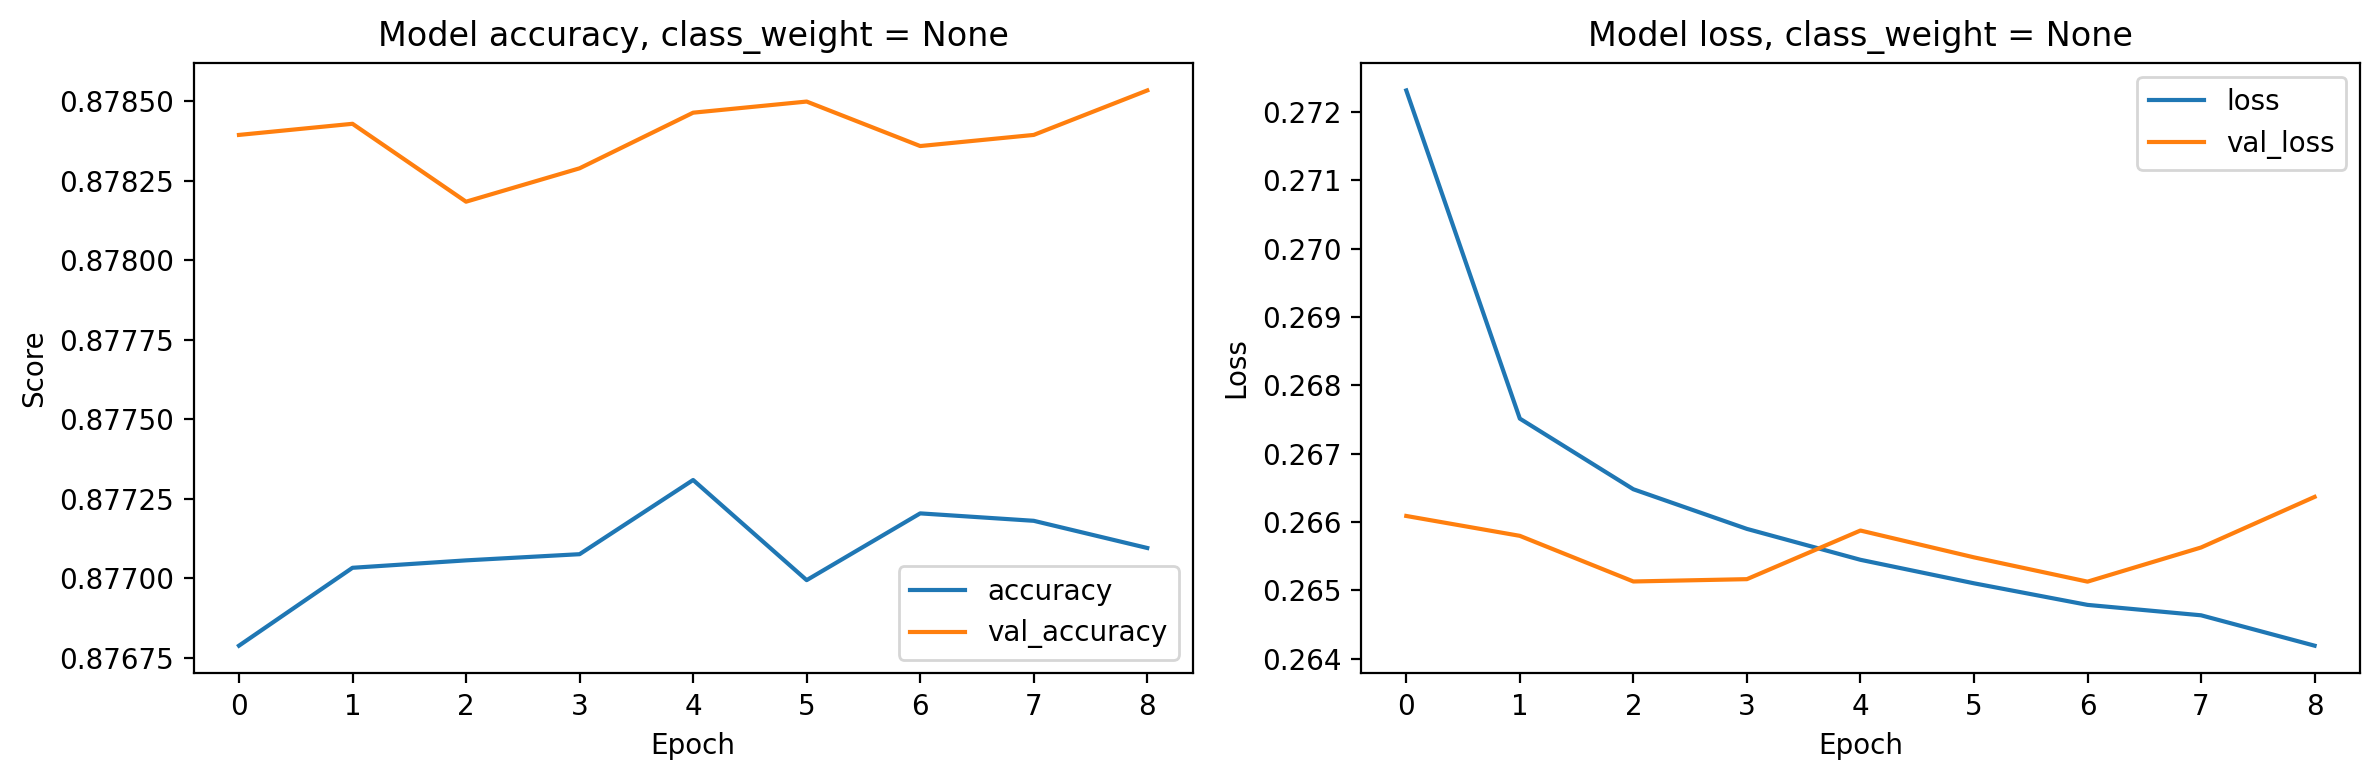

In [24]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_full_size_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_full_size_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_full_size_history.history['loss'], label = 'loss')
ax[1].plot(network_full_size_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

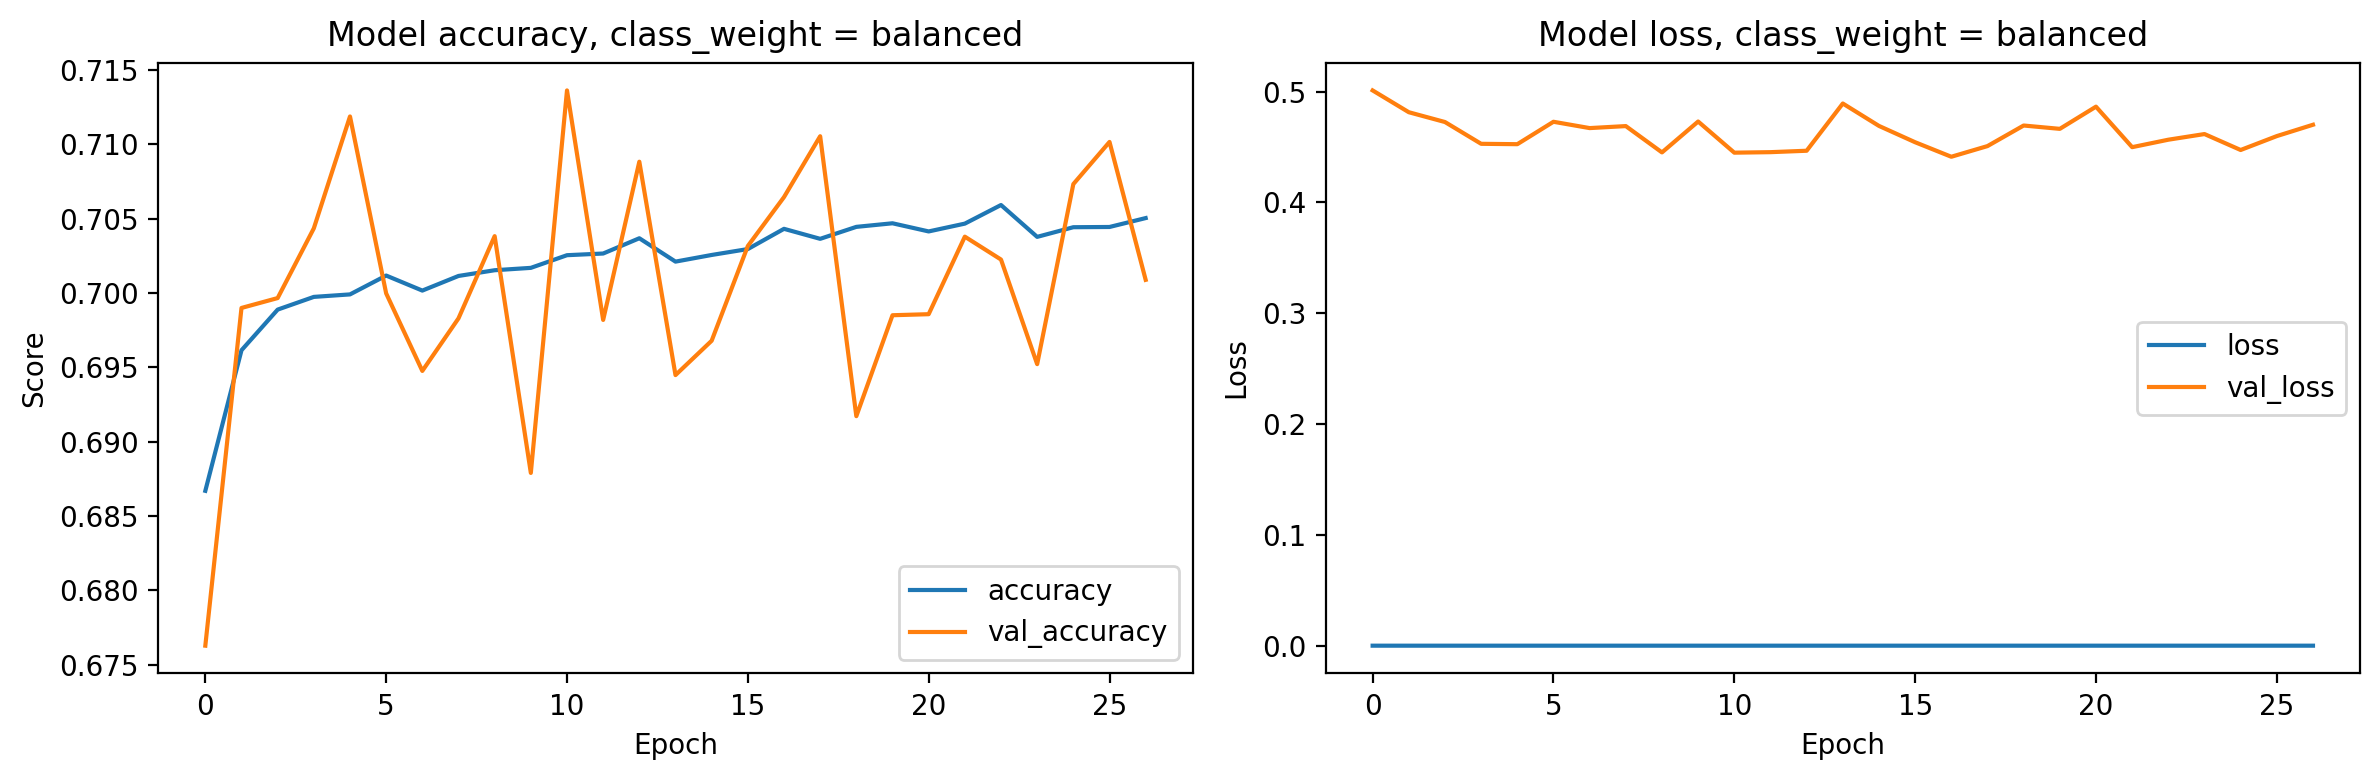

In [25]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_full_size_balanced.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_full_size_balanced.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_full_size_balanced.history['loss'], label = 'loss')
ax[1].plot(history_network_full_size_balanced.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [26]:
test_loss, test_acc = network_full_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 4s - loss: 0.2651 - accuracy: 0.8784 - 4s/epoch - 1ms/step
Test Accuracy: 87.84%


In [27]:
y_pred = network_full_size.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [28]:
confusion_matrix(y_test, y_pred)

array([[83620,    67],
       [11521,    70]])

In [39]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      1.00      0.94     83687
    Interested       0.51      0.01      0.01     11591

      accuracy                           0.88     95278
     macro avg       0.69      0.50      0.47     95278
  weighted avg       0.83      0.88      0.82     95278



In [48]:
def plot_clf_report(clf_report, title, cmap):
    plt.figure(figsize = (5,4), dpi = 170)
    fig = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap = cmap)
    fig.set_title(title)
    plt.show()

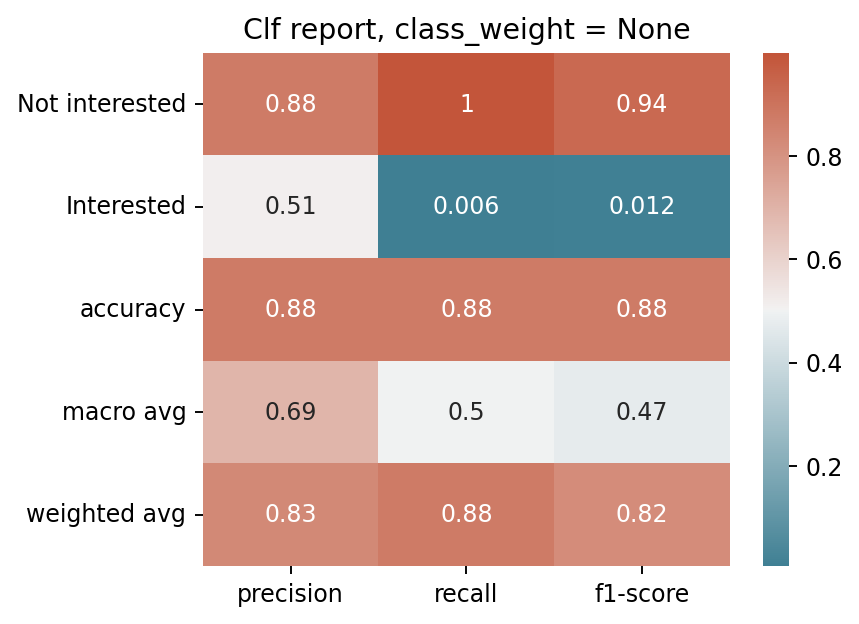

In [49]:
full_size_clf_report = classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested'], output_dict=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plot_clf_report(full_size_clf_report, 'Clf report, class_weight = None', cmap=cmap)

#### Model with class_weights

In [50]:
test_loss, test_acc = network_full_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 4s - loss: 0.4712 - accuracy: 0.7006 - 4s/epoch - 1ms/step
Test Accuracy: 70.06%


In [51]:
y_pred = network_full_size_balanced.predict(X_test_scaled)
y_pred = np.where(y_pred > threshold, 1,0)

In [52]:
confusion_matrix(y_test, y_pred)

array([[55977, 27710],
       [  818, 10773]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.99      0.65      0.78     83687
    Interested       0.27      0.95      0.42     11591

      accuracy                           0.68     95278
     macro avg       0.63      0.80      0.60     95278
  weighted avg       0.90      0.68      0.74     95278



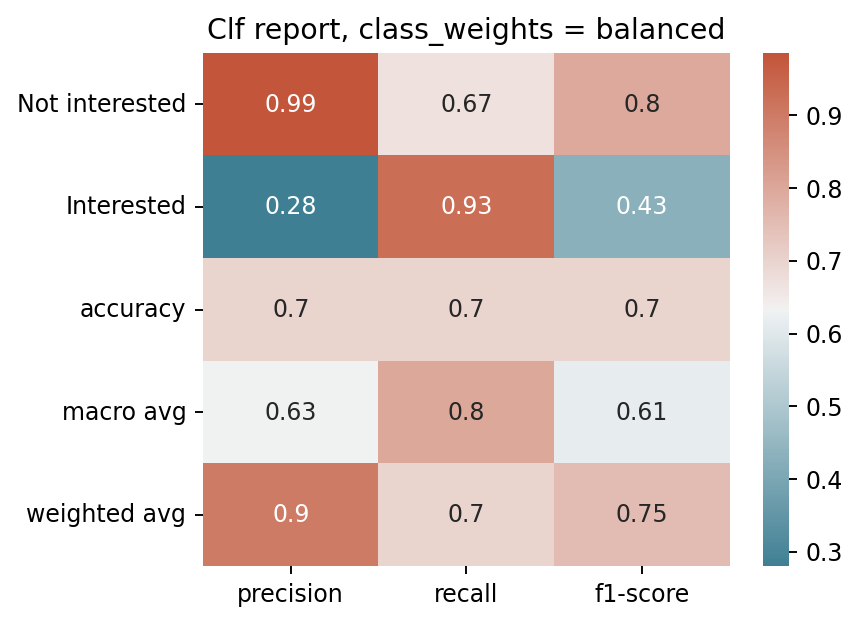

In [55]:
full_size_balanced_clf_report = classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested'], output_dict = True)
plot_clf_report(full_size_balanced_clf_report, 'Clf report, class_weights = balanced', cmap = cmap)

## Neural Network on the small size dataset

### Loading and splitting the data

In [56]:
df_small = pd.read_csv('/content/drive/MyDrive/BDA final project/data-small-size.csv')
df_small.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,35377,35378,1,58,1,0,1,22811.0,29,0,...,0,0,0,0,0,0,0,1,0,0
1,19830,19831,1,21,1,0,1,33282.0,159,0,...,0,0,0,0,0,1,0,0,1,0
2,128911,128912,1,23,1,0,1,39853.0,213,0,...,0,0,0,0,0,0,0,0,1,0
3,120005,120006,1,20,1,0,0,29252.0,146,0,...,0,0,0,0,0,1,0,0,1,0
4,180819,180820,0,63,1,0,1,45202.0,196,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
df_small = df_small.iloc[:,2:]
df_small.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,58,1,0,1,22811.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,21,1,0,1,33282.0,159,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,23,1,0,1,39853.0,213,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,0,0,29252.0,146,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,63,1,0,1,45202.0,196,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df_small['Response'].value_counts()

0    50146
1     7020
Name: Response, dtype: int64

In [59]:
X = df_small.drop('Response', axis = 1)
y = df_small['Response']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [61]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [62]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [63]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(14292, 218)
(14292,)


### Constructing the models and tuning

In [64]:
network_small_size = design_model('network_small_size')
network_small_size.summary()

Model: "network_small_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                14016     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [65]:
network_small_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [66]:
history_network_small_size = network_small_size.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es])

Epoch 1/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2918 - accuracy: 0.8726 - val_loss: 0.2722 - val_accuracy: 0.8731
Epoch 2/70
1206/1206 [==============================] - 3s 3ms/step - loss: 0.2722 - accuracy: 0.8766 - val_loss: 0.2715 - val_accuracy: 0.8731
Epoch 3/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2695 - accuracy: 0.8766 - val_loss: 0.2712 - val_accuracy: 0.8731
Epoch 4/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2677 - accuracy: 0.8766 - val_loss: 0.2705 - val_accuracy: 0.8731
Epoch 5/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2668 - accuracy: 0.8766 - val_loss: 0.2726 - val_accuracy: 0.8729
Epoch 6/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2657 - accuracy: 0.8773 - val_loss: 0.2707 - val_accuracy: 0.8734
Epoch 7/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2642 - accuracy: 0.8767 - val_loss: 0.2725 - val_accuracy:

In [67]:
network_small_size_balanced = design_model('network_small_size_balanced')
network_small_size_balanced.summary()

Model: "network_small_size_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                14016     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [68]:
network_small_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [69]:
counts_small_size = np.bincount(y_train)
weight_for_0 = 1.0 / counts_small_size[0]
weight_for_1 = 1.0 / counts_small_size[1]
class_weight_small_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000266177, weight for 1(Interested) 0.0001885014


In [70]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts_small_size[1], 100 * float(counts_small_size[1]) / len(y_train)))

Number of positive samples in training data: 5305 (12.37% of total)


In [71]:
network_small_size_balanced_history = network_small_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_small_size)

Epoch 1/70
1206/1206 [==============================] - 6s 4ms/step - loss: 2.2153e-05 - accuracy: 0.6760 - val_loss: 0.4616 - val_accuracy: 0.6994
Epoch 2/70
1206/1206 [==============================] - 4s 3ms/step - loss: 2.0374e-05 - accuracy: 0.6855 - val_loss: 0.4435 - val_accuracy: 0.7027
Epoch 3/70
1206/1206 [==============================] - 4s 3ms/step - loss: 2.0232e-05 - accuracy: 0.6886 - val_loss: 0.4446 - val_accuracy: 0.7087
Epoch 4/70
1206/1206 [==============================] - 4s 3ms/step - loss: 2.0067e-05 - accuracy: 0.6926 - val_loss: 0.4430 - val_accuracy: 0.7132
Epoch 5/70
1206/1206 [==============================] - 4s 3ms/step - loss: 1.9963e-05 - accuracy: 0.6948 - val_loss: 0.4588 - val_accuracy: 0.7108
Epoch 6/70
1206/1206 [==============================] - 4s 3ms/step - loss: 1.9833e-05 - accuracy: 0.6984 - val_loss: 0.4663 - val_accuracy: 0.7008
Epoch 7/70
1206/1206 [==============================] - 4s 3ms/step - loss: 1.9771e-05 - accuracy: 0.6979 - val_

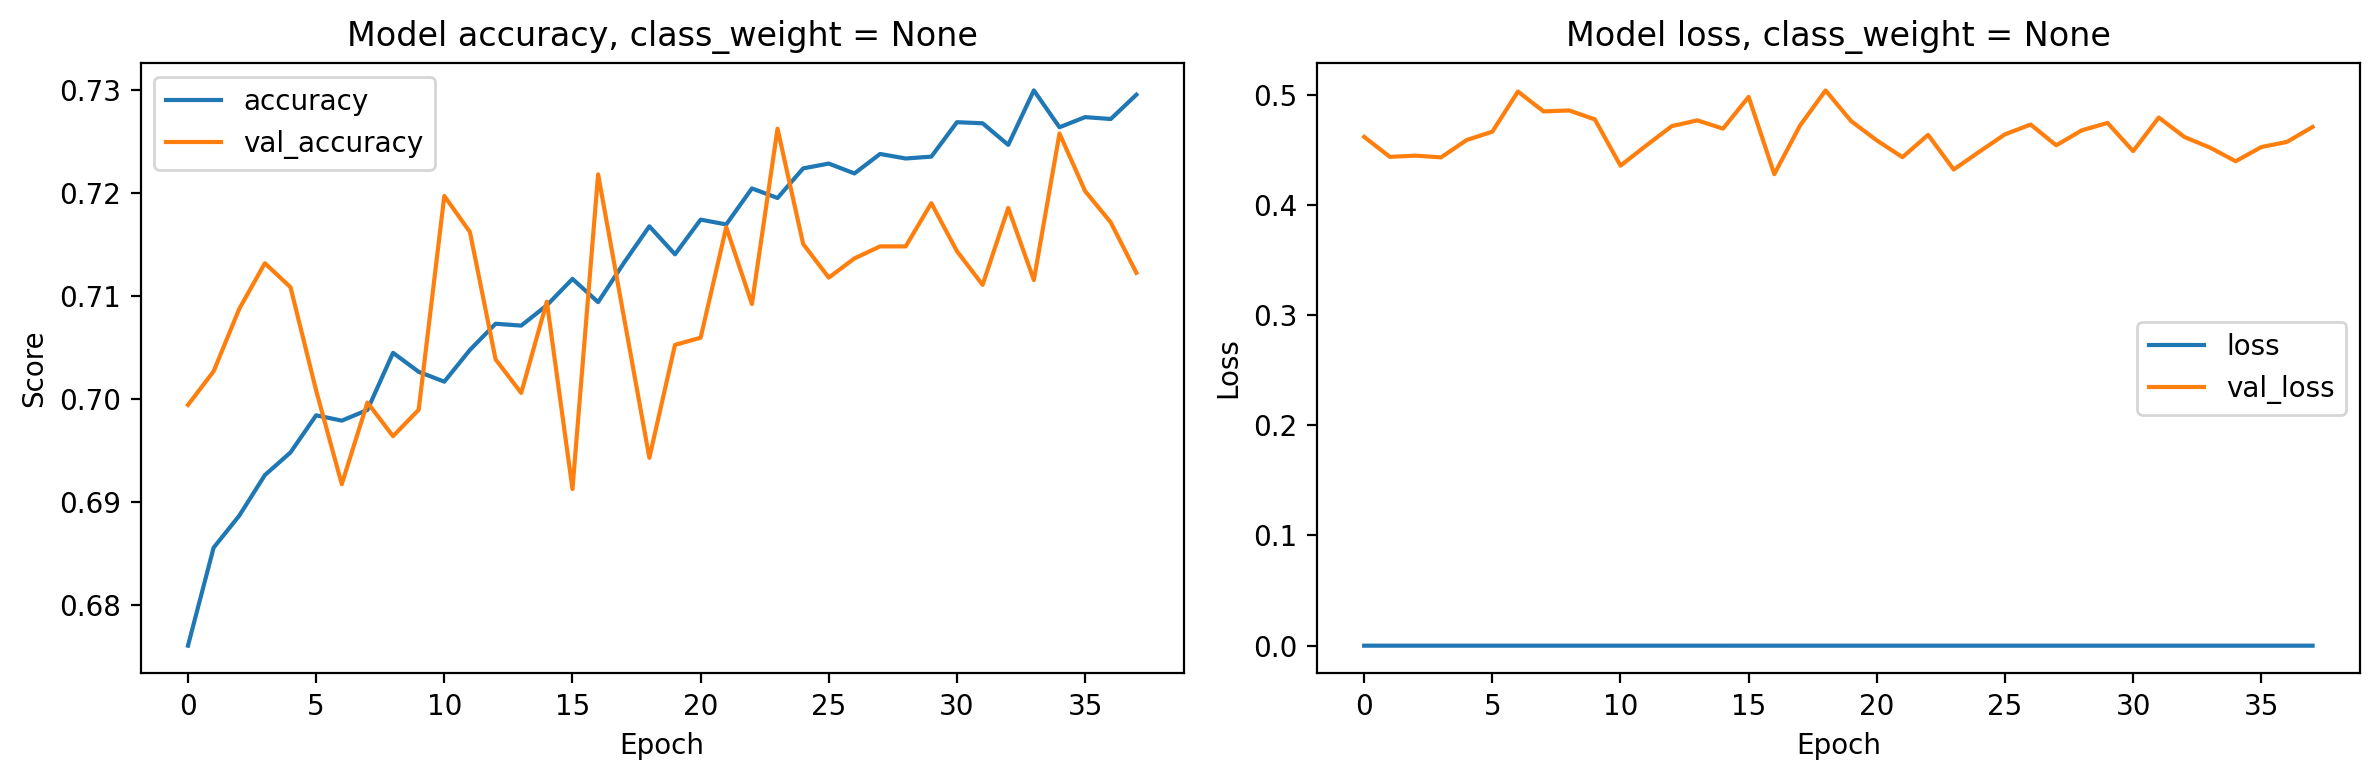

In [72]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_small_size_balanced_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_small_size_balanced_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_small_size_balanced_history.history['loss'], label = 'loss')
ax[1].plot(network_small_size_balanced_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

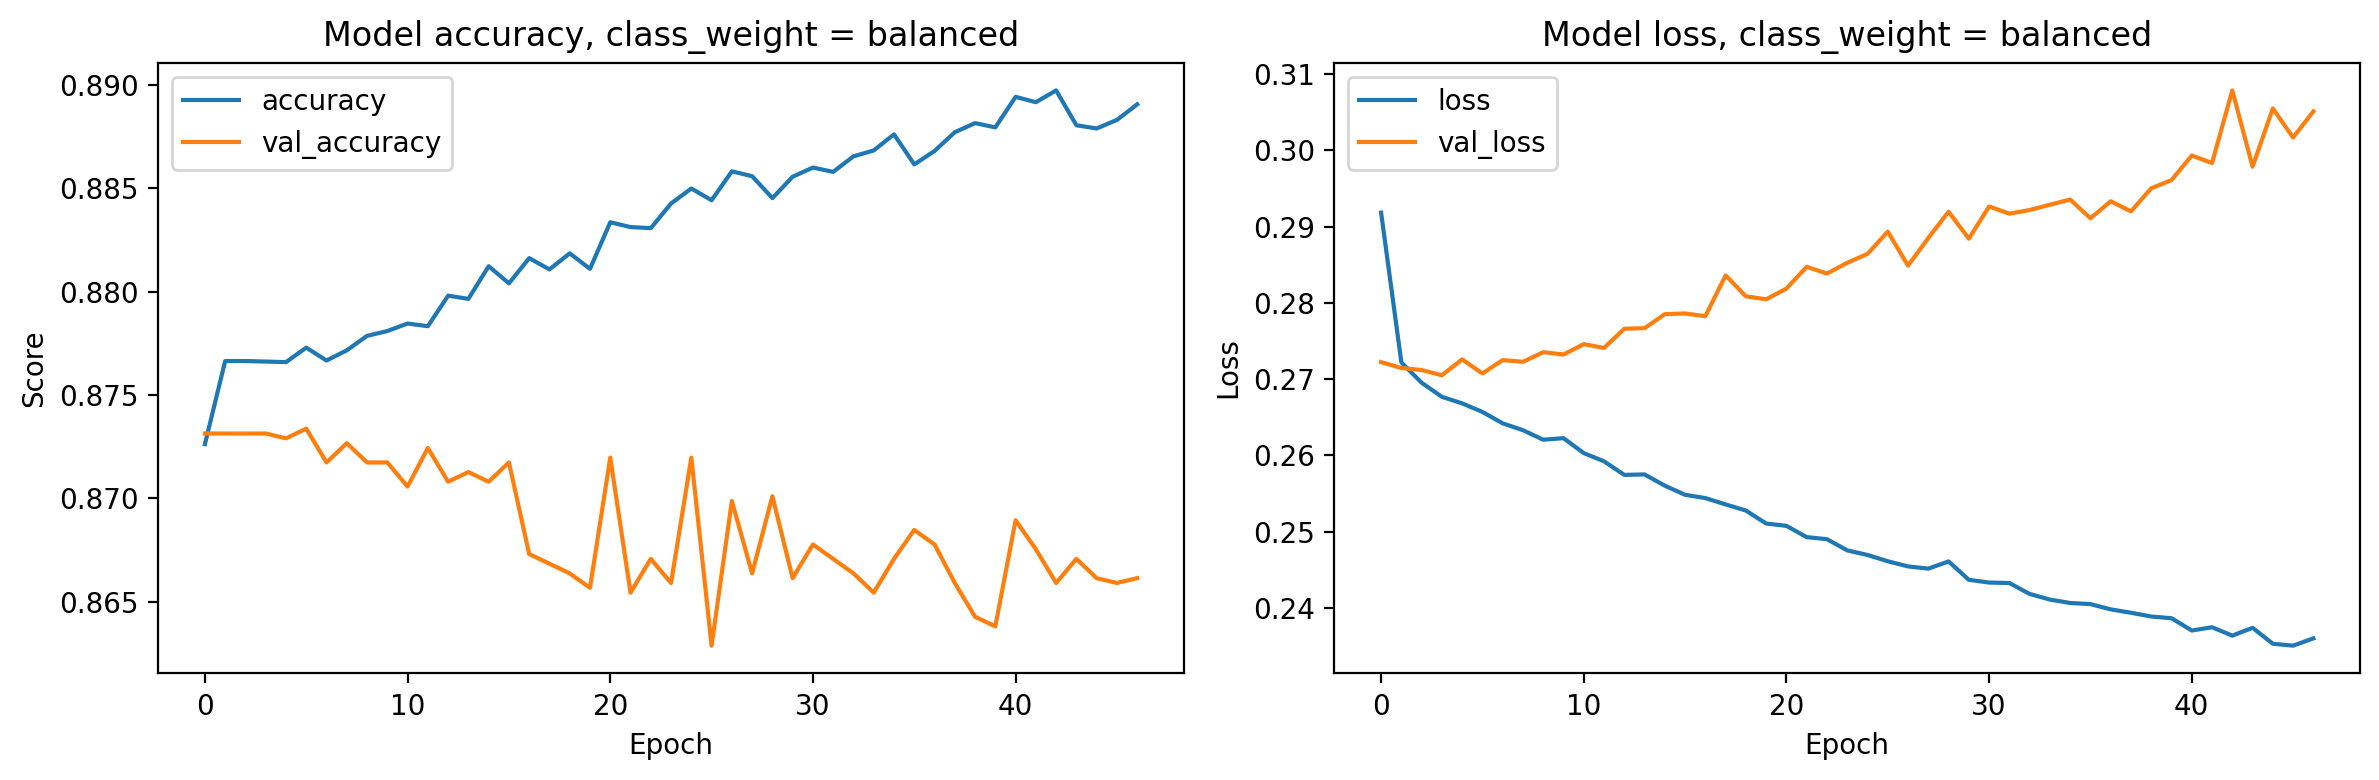

In [73]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_small_size.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_small_size.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_small_size.history['loss'], label = 'loss')
ax[1].plot(history_network_small_size.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [74]:
test_loss, test_acc = network_small_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

447/447 - 1s - loss: 0.3003 - accuracy: 0.8745 - 934ms/epoch - 2ms/step
Test Accuracy: 87.45%


In [75]:
def convert_y_pred_classes(y_pred, threshold):
  y_pred = np.where(y_pred > threshold, 1,0)
  return y_pred

In [76]:
y_pred = network_small_size.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [77]:
confusion_matrix(y_test, y_pred)

array([[12355,   222],
       [ 1572,   143]])

In [79]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.89      0.98      0.93     12577
    Interested       0.39      0.08      0.14      1715

      accuracy                           0.87     14292
     macro avg       0.64      0.53      0.53     14292
  weighted avg       0.83      0.87      0.84     14292



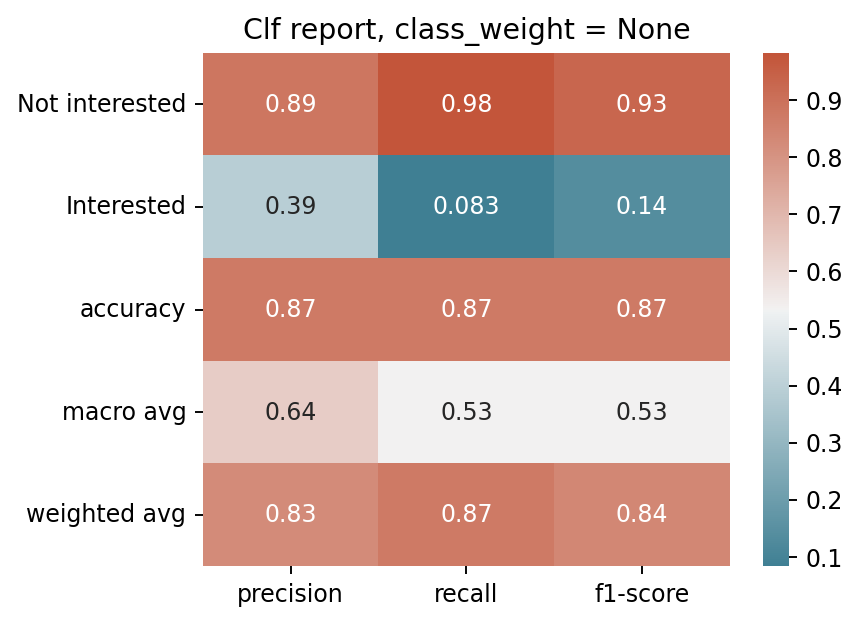

In [81]:
small_size_clf_report = classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested'], output_dict=True)
plot_clf_report(small_size_clf_report, 'Clf report, class_weight = None', cmap = cmap)

#### Model with class_weights

In [85]:
test_loss, test_acc = network_small_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

447/447 - 1s - loss: 0.4860 - accuracy: 0.6980 - 837ms/epoch - 2ms/step
Test Accuracy: 69.80%


In [86]:
y_pred = network_small_size_balanced.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [87]:
confusion_matrix(y_test, y_pred)

array([[8453, 4124],
       [ 192, 1523]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.98      0.67      0.80     12577
    Interested       0.27      0.90      0.42      1715

      accuracy                           0.70     14292
     macro avg       0.63      0.79      0.61     14292
  weighted avg       0.90      0.70      0.75     14292



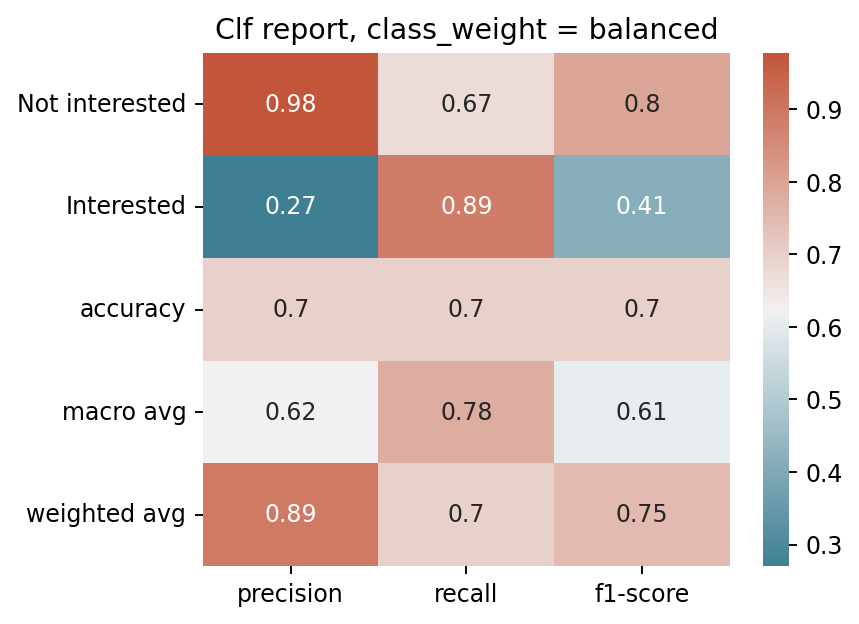

In [88]:
small_size_balanced_clf_report = classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested'], output_dict=True)
plot_clf_report(small_size_balanced_clf_report, 'Clf report, class_weight = balanced', cmap=cmap)

## Neural network on the small size manually balanced dataset

### Loading and splitting the data 

In [89]:
df_small_manually_balanced = pd.read_csv('/content/drive/MyDrive/BDA final project/data-small-size-balanced.csv')
df_small_manually_balanced.head() 

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,194037,194038,1,43,1,0,1,2630.0,46,1,...,0,0,0,0,0,0,0,1,0,0
1,166096,166097,1,28,1,0,1,2630.0,281,1,...,0,0,1,0,0,0,0,1,0,0
2,228045,228046,0,34,1,0,1,50812.0,145,1,...,0,0,0,0,0,0,0,1,0,0
3,281334,281335,1,43,1,0,1,39089.0,21,1,...,0,0,0,0,0,0,0,1,0,0
4,102730,102731,1,44,1,0,1,34162.0,115,1,...,0,0,0,0,0,0,0,1,0,0


In [90]:
df_small_manually_balanced = df_small_manually_balanced.iloc[:, 2:]
df_small_manually_balanced.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,43,1,0,1,2630.0,46,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,28,1,0,1,2630.0,281,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,34,1,0,1,50812.0,145,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,43,1,0,1,39089.0,21,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,44,1,0,1,34162.0,115,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
df_small_manually_balanced['Response'].value_counts()

1    28583
0    28583
Name: Response, dtype: int64

In [92]:
X = df_small_manually_balanced.drop('Response', axis = 1)
y = df_small_manually_balanced['Response']

In [93]:
X_train, _, y_train, _ = train_test_split(X, y, random_state = 12)

In [94]:
test_size = len(df_small_manually_balanced.sample(frac=0.33))
test_df = df_full_size.sample(n=test_size)
test_df['Response'].value_counts()

0    16485
1     2380
Name: Response, dtype: int64

In [95]:
X_test = test_df.drop('Response', axis = 1)
y_test = test_df['Response']

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(18865, 218)
(18865,)


In [97]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [98]:
#Example of scaled feature
X_train_scaled[0][0]

0.6370230422525529

### Creating and tuning the models

In [99]:
network_small_size_manually_balanced = design_model('network_small_size_manually_balanced')
network_small_size_manually_balanced.summary()

Model: "network_small_size_manually_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                14016     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [100]:
network_small_size_manually_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [101]:
network_small_size_manually_balanced_history = network_small_size_manually_balanced.fit(
    X_train_scaled, 
    y_train, 
    validation_split = 0.1, 
    epochs = 70, 
    callbacks = [es]                       
)

Epoch 1/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.4326 - val_accuracy: 0.7950
Epoch 2/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.4283 - accuracy: 0.7973 - val_loss: 0.4320 - val_accuracy: 0.7943
Epoch 3/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.4238 - accuracy: 0.7991 - val_loss: 0.4377 - val_accuracy: 0.7908
Epoch 4/70
1206/1206 [==============================] - 3s 3ms/step - loss: 0.4221 - accuracy: 0.8009 - val_loss: 0.4317 - val_accuracy: 0.7934
Epoch 5/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.4213 - accuracy: 0.8024 - val_loss: 0.4316 - val_accuracy: 0.7941
Epoch 6/70
1206/1206 [==============================] - 3s 3ms/step - loss: 0.4182 - accuracy: 0.8033 - val_loss: 0.4334 - val_accuracy: 0.7906
Epoch 7/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.4180 - accuracy: 0.8032 - val_loss: 0.4340 - val_accuracy:

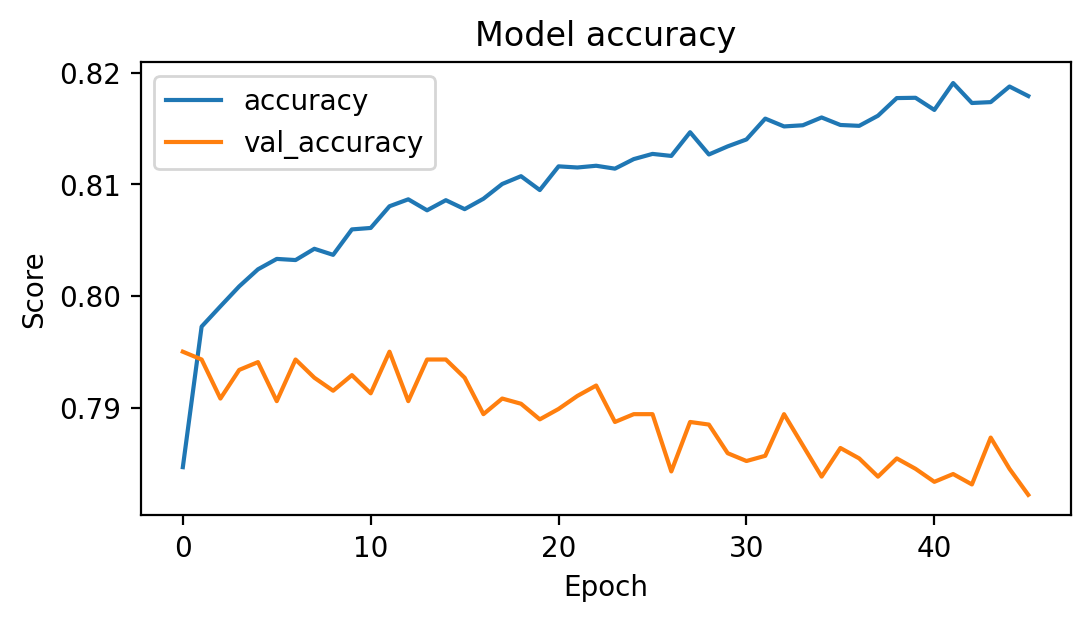

In [103]:
fig, ax = plt.subplots(figsize=(6,3), dpi = 200)
ax.plot(network_small_size_manually_balanced_history.history['accuracy'], label = 'accuracy')
ax.plot(network_small_size_manually_balanced_history.history['val_accuracy'], label = 'val_accuracy')
ax.set(title = 'Model accuracy', xlabel = 'Epoch', ylabel = 'Score')
ax.legend()

plt.show()

### Evaluating the model

In [104]:
test_loss, test_acc = network_small_size_manually_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

590/590 - 2s - loss: 0.4705 - accuracy: 0.7194 - 2s/epoch - 3ms/step
Test Accuracy: 71.94%


In [105]:
y_pred = network_small_size_manually_balanced.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [106]:
print(confusion_matrix(y_test, y_pred))

[[11373  5112]
 [  182  2198]]


In [107]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.98      0.69      0.81     16485
    Interested       0.30      0.92      0.45      2380

      accuracy                           0.72     18865
     macro avg       0.64      0.81      0.63     18865
  weighted avg       0.90      0.72      0.77     18865



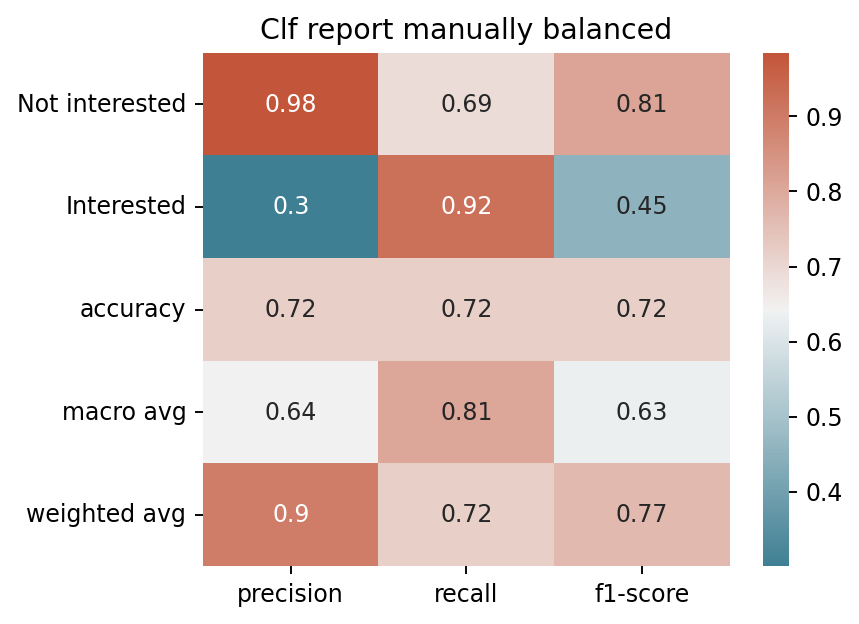

In [108]:
small_size_manually_balanced_clf_report = classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested'], output_dict=True)
plot_clf_report(small_size_manually_balanced_clf_report, 'Clf report manually balanced', cmap=cmap)